# **1mg Medicine Dataset 2025 Web Scraping**


## **Analysis Pipeline**
**1. Load the Analysis Stack**

**2. Load data**

**3. Quick data audit**

**4. Feature Engineering and Data Splitting**

**5. Model Training**

**6. Model Evaluation**

## **1. Load the Analysis Stack**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## **2. Load data**

In [42]:
df = pd.read_csv('/content/onemg.csv')
print("✅ Loaded successfully!")
print("Shape:", df.shape)
df.head()

✅ Loaded successfully!
Shape: (780, 35)


,Drug_Name,Drug_URL,Drug_Type,Prescription_Required,MRP,Discount_Percentage,Selling_Price,Price_Per_Unit,Manufacturer,Marketer,...,Substitute_Count,Substitute_List,Chemical_Class,Habit_Forming,Therapeutic_Class,Action_Class,Overall_Rating,In_Stock,Scraped_At,Page_Title
0,Aciloc 150 Tablet,https://www.1mg.com/drugs/aciloc-150-tablet-13...,Tablet,Yes,? 50.44,15%,? 1.02,NaN,Cadila Pharmaceuticals Ltd,Cadila Pharmaceuticals Ltd,...,44,27% cheaper alternative available; 27% cheaper...,Aralkylamines Derivative Habit Forming No Ther...,No Therapeutic Class GASTRO INTESTINAL Action ...,Hair Care Hair Oils Shampoos & Conditioners Ha...,Histamine Type-2 Receptor Antagonists (H2 Bloc...,NaN,Yes,21-10-2025 17:36,"Aciloc 150 Tablet: View Uses, Side Effects, Pr..."
1,Actorise 100 Injection,https://www.1mg.com/drugs/actorise-100-injecti...,Injection,Yes,"? 7,549",15%,"? 5,484.38",NaN,Cipla Ltd,Cipla Ltd,...,57,View available alternative with same salt comp...,"Amino Acids, Peptides Analogues Habit Forming ...",No Therapeutic Class BLOOD RELATED Action Clas...,Hair Care Hair Oils Shampoos & Conditioners Ha...,Erythropoiesis-Stimulating Agents (ESAs) Inter...,NaN,No,21-10-2025 17:36,"Actorise 100 Injection: View Uses, Side Effect..."
2,Actorise 200 Injection,https://www.1mg.com/drugs/actorise-200-injecti...,Injection,Yes,"? 14,069",15%,"? 11,990.00",NaN,Cipla Ltd,Cipla Ltd,...,57,View available alternative with same salt comp...,"Amino Acids, Peptides Analogues Habit Forming ...",No Therapeutic Class BLOOD RELATED Action Clas...,Hair Care Hair Oils Shampoos & Conditioners Ha...,Erythropoiesis-Stimulating Agents (ESAs) Inter...,NaN,No,21-10-2025 17:36,"Actorise 200 Injection: View Uses, Side Effect..."
3,Actorise 25 Injection,https://www.1mg.com/drugs/actorise-25-injectio...,Injection,Yes,NaN,15%,"? 1,899.00",NaN,Cipla Ltd,Cipla Ltd,...,64,View available alternative with same salt comp...,"Amino Acids, Peptides Analogues Habit Forming ...",No Therapeutic Class BLOOD RELATED Action Clas...,Hair Care Hair Oils Shampoos & Conditioners Ha...,Erythropoiesis-Stimulating Agents (ESAs) Inter...,NaN,No,21-10-2025 17:36,"Actorise 25 Injection: View Uses, Side Effects..."
4,Actorise 40 Injection,https://www.1mg.com/drugs/actorise-40-injectio...,Injection,Yes,NaN,15%,"? 3,127.00",NaN,Cipla Ltd,Cipla Ltd,...,64,View available alternative with same salt comp...,"Amino Acids, Peptides Analogues Habit Forming ...",No Therapeutic Class BLOOD RELATED Action Clas...,Hair Care Hair Oils Shampoos & Conditioners Ha...,Erythropoiesis-Stimulating Agents (ESAs) Inter...,NaN,No,21-10-2025 17:36,"Actorise 40 Injection: View Uses, Side Effects..."


## **3. Quick data audit**

,Column,Null Values
0,Price_Per_Unit,780
1,Overall_Rating,780
2,Driving_Safety,581
3,Breastfeeding_Safety,407
4,Alcohol_Interaction,360
5,Kidney_Safety,354
6,Action_Class,274
7,Chemical_Class,266
8,Pregnancy_Safety,182
9,In_Stock,129


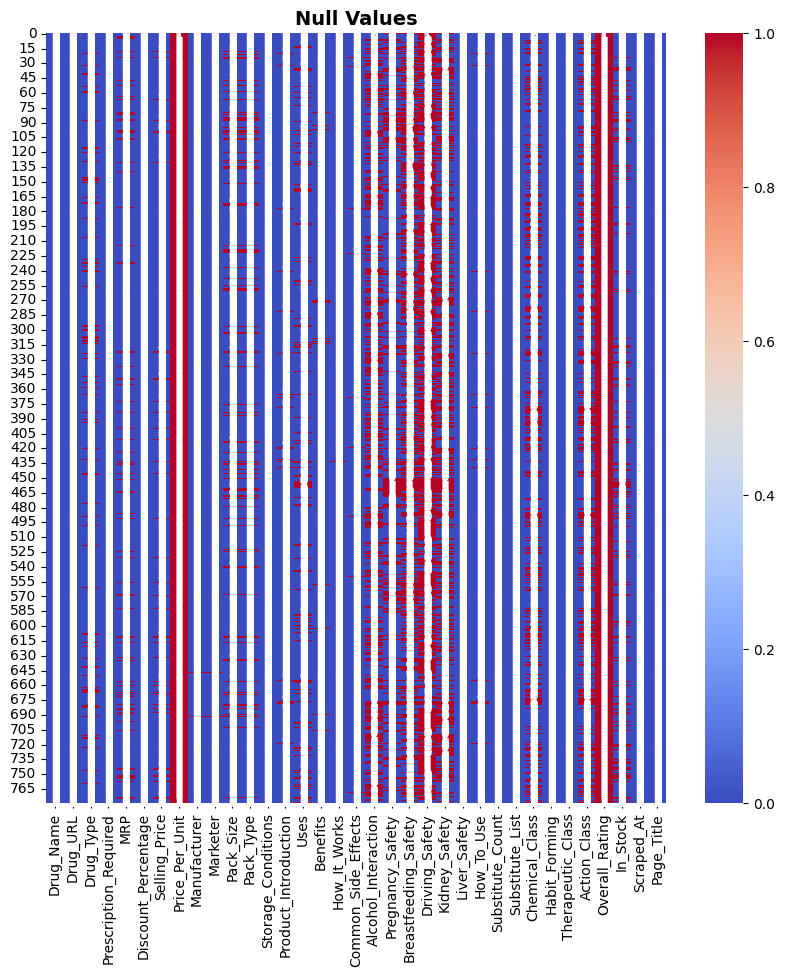

In [43]:
Null_Value = df.isnull().sum().sort_values(ascending=False)
Null_Value = pd.DataFrame({"Column": Null_Value.index,"Null Values": Null_Value.values})
display(Null_Value)

plt.figure(figsize=(10, 10))
sns.heatmap(df.isnull(), annot=True, cmap='coolwarm')
plt.title("Null Values", fontsize=14, weight='bold')
plt.show()

## **4. Feature Engineering and Data Splitting**

In [51]:
if df is not None:

    for col in ['MRP', 'Selling_Price']:
        if col in df.columns:
            df[col] = (
                df[col]
                .astype(str)
                .str.replace('?', '', regex=False)
                .str.replace(',', '', regex=False)
            )
            df[col] = pd.to_numeric(df[col], errors='coerce')


    target_column = 'Substitute_Count'
    feature_columns = ['MRP', 'Selling_Price']

    if target_column in df.columns and df[target_column].notna().any():

        available_feature_columns = [
            col for col in feature_columns
            if col in df.columns and df[col].notna().any()
        ]

        if available_feature_columns:

            X = df[available_feature_columns]
            y = df[target_column]

            combined = pd.concat([X, y], axis=1).dropna()

            if not combined.empty:

                X = combined[available_feature_columns]
                y = combined[target_column]

                X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.2, random_state=42
                )

                display(X_train.head())
                display(X_test.head())
                display(y_train.head())
                display(y_test.head())

            else:
                X = None
                y = None
        else:
            X = None
            y = None
    else:
        X = None
        y = None

else:
    X = None
    y = None


,MRP,Selling_Price
187,399305.00,399305.00
259,5793.00,4923.00
311,133.47,1.05
290,184.50,4.34
129,746.20,609.38


,MRP,Selling_Price
542,155.50,9.07
186,479.90,14.60
61,14437.50,242.10
638,210.94,12.20
666,148.13,82.97


,Substitute_Count
187,6
259,6
311,42
290,28
129,44


,Substitute_Count
542,21
186,86
61,42
638,37
666,42


## **5. Model Training**

In [45]:
if 'X_train' in locals() and X_train is not None:

    model = LinearRegression()
    model.fit(X_train, y_train)
    print("Model trained successfully!")
else:
    print("Training data not available. Skipping model training.")

Model trained successfully!


## **6. Model Evaluation**

,Metric,Value
0,Mean Squared Error (MSE),711.031548
1,R-squared (R2),0.039047


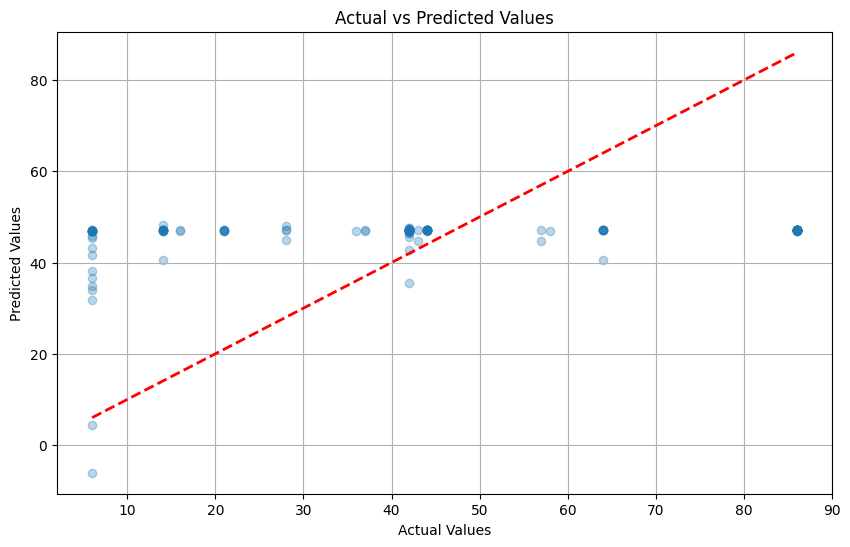

In [52]:
if 'model' in locals() and 'X_test' in locals() and X_test is not None:
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics_df = pd.DataFrame({
        "Metric": ["Mean Squared Error (MSE)", "R-squared (R2)"],
        "Value": [mse, r2]
    })

    display(metrics_df.style.background_gradient(cmap="Blues"))

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.grid(True)
    plt.show()